In [1]:
import demes
import demesdraw
import msprime
import tskit
import matplotlib.pyplot as plt

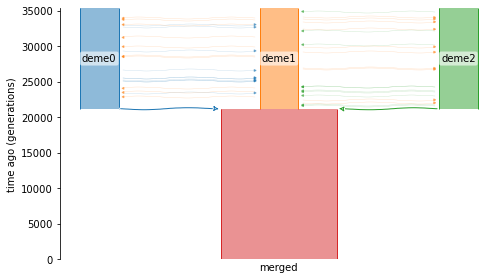

In [2]:
graph = demes.load("IM_to_one.yaml")
demesdraw.tubes(graph, inf_ratio=0.4);

In [4]:
# Convert to ms 
demography = msprime.Demography.from_demes(graph)

In [6]:
seqlen = 1000
ts = msprime.sim_ancestry(samples=[msprime.SampleSet(100,population="deme0", time=23000),msprime.SampleSet(100,population="deme1",time=23000)], sequence_length=seqlen, demography=demography, random_seed=12)
ts

In [5]:
mts = msprime.sim_mutations(ts, rate=0.01, random_seed=5678)

In [11]:
with open("output.vcf", "w") as vcf_file:
    mts.write_vcf(vcf_file)

In [21]:
mts

In [46]:
demography2 = msprime.Demography.isolated_model([N] * 3)
demography2.add_population(name="merged",initial_size=3*N)
demography2.add_admixture(time=time_merge,derived="merged", ancestral=["pop_0","pop_1","pop_2"],proportions= [0.33,0.33,0.34])

Admixture(time=21200.0, derived='merged', ancestral=['pop_0', 'pop_1', 'pop_2'], proportions=[0.33, 0.33, 0.34])

### Coding the merge as an Admixture event

In [20]:
N=1000
time_merge=200
demography = msprime.Demography()
demography.add_population(name="A",initial_size=N,initially_active=False,default_sampling_time=time_merge+1)
demography.add_population(name="B",initial_size=N,initially_active=False,default_sampling_time=time_merge+1)
demography.add_population(name="C",initial_size=N,initially_active=False,default_sampling_time=time_merge+1)
demography.add_population(name="merged",initial_size=3*N)
demography.add_admixture(time=time_merge,derived="merged", ancestral=["A","B","C"],proportions= [ 1 / 3, 1 / 3 , 1 / 3])

demography.add_symmetric_migration_rate_change(time=time_merge, populations=["A", "B","C"], rate=25e-5)


SymmetricMigrationRateChange(time=200, populations=['A', 'B', 'C'], rate=0.00025)

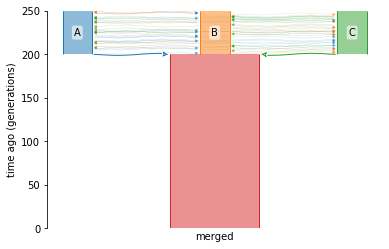

In [21]:
graph = msprime.Demography.to_demes(demography)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

In [27]:
seqlen=1000
ts_t0 = msprime.sim_ancestry(samples=[msprime.SampleSet(100,"A", time=time_merge+1),msprime.SampleSet(100,"B", time=time_merge+1),msprime.SampleSet(100,"C", time=time_merge+1)], sequence_length=seqlen, demography=demography, random_seed=12)
ts_t1 = msprime.sim_ancestry(samples=[msprime.SampleSet(100,population="merged", time=time_merge-1)],sequence_length=seqlen, demography=demography, random_seed=12)
ts_t2 = msprime.sim_ancestry(samples=[msprime.SampleSet(100,population="merged", time=time_merge-50)],sequence_length=seqlen, demography=demography, random_seed=12)
ts_t3 = msprime.sim_ancestry(samples=[msprime.SampleSet(100,population="merged", time=time_merge-100)],sequence_length=seqlen, demography=demography, random_seed=12)
ts_tpresent = msprime.sim_ancestry(samples=[msprime.SampleSet(100,population="merged", time=0)],sequence_length=seqlen, demography=demography, random_seed=12)


### Coding the merge as a mass migration

In [144]:
N=1000
time_merge=200
# time_merge=0
demography = msprime.Demography()
demography.add_population(name="A",initial_size=N,initially_active=False,default_sampling_time=time_merge+1)
demography.add_population(name="B",initial_size=N,initially_active=False,default_sampling_time=time_merge+1)
demography.add_population(name="C",initial_size=N,initially_active=False,default_sampling_time=time_merge+1)
demography.add_population(name="merged",initial_size=10)
demography.add_mass_migration(time=time_merge,source="A",dest="merged",proportion=1)
demography.add_mass_migration(time=time_merge,source="B",dest="merged",proportion=1) 

MassMigration(time=200, source='B', dest='merged', proportion=1)

In [145]:
graph = msprime.Demography.to_demes(demography)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

ValueError: Events must be time-sorted. Please use demography.sort_events()if you add events out of order.

### Simulating only the ancestral populations and trying to sample

In [116]:
N=1000
demography = msprime.Demography()
demography.add_population(name="A",initial_size=N,)
demography.add_population(name="B",initial_size=N)
demography.add_population(name="C",initial_size=N)

Population(initial_size=1000, growth_rate=0, name='C', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2)

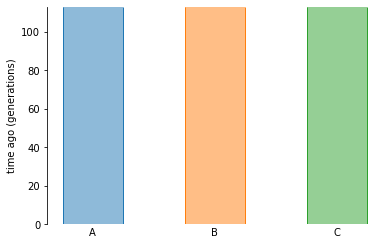

In [117]:
graph = msprime.Demography.to_demes(demography)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

In [122]:
seqlen=1000
#ts_t0 = msprime.sim_ancestry(samples=[msprime.SampleSet(10,"A", time=time_merge+1),msprime.SampleSet(10,"B", time=time_merge+1),msprime.SampleSet(10,"C", time=time_merge+1)], sequence_length=seqlen, demography=demography, random_seed=12)
ts_t1 = msprime.sim_ancestry(samples={"A":10},sequence_length=seqlen, demography=demography, random_seed=12)